In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
import pandas as pd
import bloscpack as bp
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from annotation_utilities import *
from registration_utilities import *
from metadata import *
from data_manager import *
from vis3d_utilities import *

Setting environment for Local Macbook Pro


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/home/yuncong/CSHL_data_processed/MD585/MD585_prep2_thumbnail/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD590/MD590_prep2_thumbnail/MD590-IHC17-2015.08.10-19.09.09_MD590_2_0050_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD591/MD591_prep2_thumbnail/MD591-IHC17-2015.08.28-04.23.47_MD591_1_0049_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD592/MD592_prep2_thumbnail/MD592-N16-2015.08.22-00.50.39_MD592_2_0047_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD593/MD593_prep2_thumbnail/MD593-N15-2015.08.21-16.53.02_MD593_3_0045_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD594/MD594_prep2_thumbnail/MD594-IHC16-2015.08.26-16.11.01_MD594_1_0046_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD595/MD595_prep2_thumbnail/MD595-IHC12-2015.09.15-01.21.39_MD595_2_0035_prep2_thumbn

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/home/yuncong/CSHL_data_processed/MD635/MD635_prep2_thumbnail/MD635-F25-2016.05.18-21.02.30_MD635_3_0075_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD653/MD653_prep2_thumbnail/MD653-F15-2016.12.20-21.04.12_MD653_1_0043_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD652/MD652_prep2_thumbnail/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD642/MD642_prep2_thumbnail/MD642-N14-2017.01.18-16.25.58_MD642_2_0041_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD657/MD657_prep2_thumbnail/MD657-N13-2017.02.22-14.33.34_MD657_3_0039_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD658/MD658_prep2_thumbnail/MD658-N18-2017.03.31-17.34.22_MD658_2_0053_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD661/MD661_prep2_thumbnail/MD662&661-F30-2017.06.05-14.49.48_MD661_1_0088_prep2_thumbnail.tif
/home/yuncong/CSHL_data_processed/MD662/MD662_prep2_thumbnail/MD662&661-F35-2017.06.05-17.08.18_MD662_1_0103_prep2_thumbn

In [2]:
stack = 'MD589'

In [3]:
atlas_name = 'atlasV5'

# Generate transformed atlas meshes

In [33]:
# Rt, cm, cf  = DataManager.load_alignment_parameters(stack_f='MD589', stack_m='atlasV5', warp_setting=20, 
#                                       prep_id_f=2, detector_id_f=15)[:3]
# G = consolidate(Rt, cm, cf)
# fake_tf = G[:3].flatten()

In [144]:
# fake_tf = affine_components_to_vector(tx=20, ty=20, tz=20, theta_xy=np.pi/10, theta_xz=np.pi/10, theta_yz=np.pi/8,
#                                      c=(180,240,190))

In [139]:
# fake_tf = np.vstack([eulerAnglesToRotationMatrix(np.pi/8*np.array((1,0.2,0.4))), [20,35,20]]).flatten()

In [155]:
# # Render initially (before global) transformed atlas structures

# # for structure in all_known_structures_sided:
# for structure in ['7N_L', '7N_R', '5N_L', '5N_R', 'SNR_L', 'SNR_R']:

#     print structure
    
#     try:
    
#         global_transformed_volume = \
#         DataManager.load_transformed_volume(stack_m=atlas_name, vol_type_m='score', 
#                                             stack_f=stack, vol_type_f='score',
#                                             downscale=32, 
#                                             detector_id_f=detector_id,
#                                             prep_id_f=2,
#                                             warp_setting=20,
#                                             structure=structure)

#         vol_inbbox, bbox = transform_volume_v2(global_transformed_volume, tf_params=fake_tf)
#         polydata = volume_to_polydata(vol_inbbox, origin=(bbox[0],bbox[2],bbox[4]), num_simplify_iter=3, smooth=True, level=0.5)

#         mesh_fp = DataManager.get_mesh_filepath(stack_m=atlas_name, vol_type_m='score', 
#                                                 stack_f=stack, vol_type_f='score', 
#                                                downscale=32,
#                                                 prep_id_f=2,
#                                             detector_id_f=detector_id,
#                                                warp_setting=91, # THIS IS ARBITRARY!
#                                                structure=structure)
# #         print mesh_fn
#         save_mesh(polydata, mesh_fp)
        
#     except Exception as e:
#         sys.stderr.write('Error transforming volume %s: %s.\n' % (structure, e))

In [217]:
# Render globally transformed atlas structures

for structure in all_known_structures_sided:
# for structure in ['Pn_R']:

    print structure
    
    try:
    
        global_transformed_volume = \
        DataManager.load_transformed_volume(stack_m=atlas_name, vol_type_m='score', 
                                            stack_f=stack, vol_type_f='score',
                                            downscale=32, 
                                            detector_id_f=detector_id,
                                            prep_id_f=2,
                                            warp_setting=20,
                                            structure=structure)

        t = time.time()
        polydata = volume_to_polydata(global_transformed_volume, num_simplify_iter=3, smooth=True, level=0.5)
        sys.stderr.write('time: %.2f\n' % (time.time() - t))

        mesh_fn = DataManager.get_mesh_filepath(stack_m=atlas_name, vol_type_m='score', 
                                                stack_f=stack, vol_type_f='score', 
                                               downscale=32,
                                                prep_id_f=2,
                                            detector_id_f=detector_id,
                                               warp_setting=20,
                                               structure=structure)
#         print mesh_fn
        save_mesh(polydata, mesh_fn)
        
    except Exception as e:
        sys.stderr.write('Error transforming volume %s: %s.\n' % (structure, e))

5N_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_5N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_5N_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_5N_L.bp"


marching cube: 10.99 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6909: 0.07 seconds
simplify 1 @ 1383: 0.06 seconds
simplify 2 @ 278: 0.02 seconds
time: 12.00


5N_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_5N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_5N_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_5N_R.bp"


marching cube: 12.12 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7075: 0.15 seconds
simplify 1 @ 1417: 0.19 seconds
simplify 2 @ 284: 0.05 seconds
time: 13.58


6N_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_6N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_6N_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_6N_L.bp"


marching cube: 17.65 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 656: 0.00 seconds
simplify 1 @ 132: 0.00 seconds
time: 18.72


6N_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_6N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_6N_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_6N_R.bp"


marching cube: 23.12 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 661: 0.02 seconds
simplify 1 @ 133: 0.02 seconds
time: 24.73


7N_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_7N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_7N_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_7N_L.bp"


marching cube: 17.41 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 12205: 0.08 seconds
simplify 1 @ 2442: 0.09 seconds


7N_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_7N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_7N_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_7N_R.bp"


simplify 2 @ 490: 0.02 seconds
time: 18.47
marching cube: 13.05 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 11919: 0.34 seconds
simplify 1 @ 2386: 0.33 seconds
simplify 2 @ 478: 0.08 seconds
time: 14.73


7n_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_7n_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_7n_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_7n_L.bp"


marching cube: 12.58 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8605: 0.06 seconds
simplify 1 @ 1723: 0.06 seconds
simplify 2 @ 346: 0.01 seconds
time: 13.61


7n_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_7n_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_7n_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_7n_R.bp"


marching cube: 11.61 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8601: 0.06 seconds
simplify 1 @ 1722: 0.06 seconds
simplify 2 @ 345: 0.01 seconds
time: 12.61


Amb_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Amb_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Amb_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Amb_L.bp"


marching cube: 12.70 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 729: 0.03 seconds
simplify 1 @ 147: 0.02 seconds
time: 13.60


Amb_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Amb_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Amb_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Amb_R.bp"


marching cube: 12.45 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 714: 0.01 seconds
simplify 1 @ 144: 0.00 seconds
time: 13.33


LC_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_LC_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_LC_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_LC_L.bp"


marching cube: 12.45 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 3426: 0.10 seconds
simplify 1 @ 686: 0.10 seconds
simplify 2 @ 138: 0.02 seconds
time: 13.55


LC_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_LC_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_LC_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_LC_R.bp"


marching cube: 31.84 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 3437: 0.10 seconds
simplify 1 @ 689: 0.10 seconds
simplify 2 @ 139: 0.02 seconds
time: 33.67


LRt_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_LRt_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_LRt_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_LRt_L.bp"


marching cube: 25.93 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 9553: 0.07 seconds
simplify 1 @ 1913: 0.06 seconds
simplify 2 @ 384: 0.01 seconds
time: 29.75


LRt_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_LRt_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_LRt_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_LRt_R.bp"


marching cube: 32.80 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 9552: 0.28 seconds
simplify 1 @ 1912: 0.29 seconds
simplify 2 @ 384: 0.07 seconds
time: 35.53


Pn_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Pn_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Pn_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Pn_L.bp"


marching cube: 37.84 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 17643: 0.57 seconds
simplify 1 @ 3531: 0.51 seconds
simplify 2 @ 707: 0.12 seconds
time: 42.78


Pn_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Pn_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Pn_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Pn_R.bp"


marching cube: 35.78 seconds
mesh_to_polydata: 0.09 seconds
simplify 0 @ 17557: 0.53 seconds
simplify 1 @ 3516: 0.51 seconds
simplify 2 @ 704: 0.12 seconds
time: 41.25


Tz_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Tz_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Tz_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Tz_L.bp"


marching cube: 35.83 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 5038: 0.16 seconds
simplify 1 @ 1009: 0.13 seconds
simplify 2 @ 203: 0.03 seconds
time: 40.28


Tz_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Tz_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Tz_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Tz_R.bp"


marching cube: 36.11 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 5181: 0.18 seconds
simplify 1 @ 1038: 0.16 seconds
simplify 2 @ 209: 0.04 seconds
time: 40.83


VLL_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_VLL_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_VLL_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_VLL_L.bp"


marching cube: 36.54 seconds
mesh_to_polydata: 0.06 seconds
simplify 0 @ 10876: 0.35 seconds
simplify 1 @ 2176: 0.31 seconds
simplify 2 @ 436: 0.08 seconds
time: 41.81


VLL_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_VLL_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_VLL_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_VLL_R.bp"


marching cube: 31.43 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 10398: 0.09 seconds
simplify 1 @ 2081: 0.07 seconds
simplify 2 @ 417: 0.02 seconds
time: 36.05


RMC_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_RMC_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_RMC_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_RMC_L.bp"


marching cube: 21.61 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 5261: 0.15 seconds
simplify 1 @ 1053: 0.16 seconds
simplify 2 @ 212: 0.04 seconds
time: 25.16


RMC_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_RMC_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_RMC_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_RMC_R.bp"


marching cube: 34.11 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5238: 0.03 seconds
simplify 1 @ 1049: 0.03 seconds
simplify 2 @ 211: 0.01 seconds
time: 37.74


SNC_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_SNC_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_SNC_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_SNC_L.bp"


marching cube: 15.46 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5688: 0.03 seconds
simplify 1 @ 1139: 0.03 seconds
simplify 2 @ 229: 0.01 seconds
time: 18.86


SNC_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_SNC_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_SNC_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_SNC_R.bp"


marching cube: 14.85 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5915: 0.04 seconds
simplify 1 @ 1185: 0.04 seconds
simplify 2 @ 238: 0.01 seconds
time: 16.22


SNR_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_SNR_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_SNR_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_SNR_L.bp"


marching cube: 12.91 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 27657: 0.20 seconds
simplify 1 @ 5533: 0.24 seconds
simplify 2 @ 1108: 0.05 seconds
time: 14.58


SNR_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_SNR_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_SNR_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_SNR_R.bp"


marching cube: 11.90 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 27939: 0.20 seconds
simplify 1 @ 5589: 0.25 seconds
simplify 2 @ 1119: 0.05 seconds
time: 13.63


3N_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_3N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_3N_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_3N_L.bp"


marching cube: 12.45 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2232: 0.02 seconds
simplify 1 @ 448: 0.02 seconds
simplify 2 @ 91: 0.00 seconds
time: 13.63


3N_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_3N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_3N_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_3N_R.bp"


marching cube: 11.62 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2201: 0.07 seconds
simplify 1 @ 441: 0.06 seconds
simplify 2 @ 89: 0.02 seconds
time: 12.90


4N_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_4N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_4N_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_4N_L.bp"


marching cube: 11.26 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 378: 0.00 seconds
simplify 1 @ 77: 0.00 seconds
time: 12.40


4N_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_4N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_4N_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_4N_R.bp"


marching cube: 12.17 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 371: 0.00 seconds
simplify 1 @ 75: 0.00 seconds
time: 13.34


Sp5I_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L.bp"


marching cube: 10.54 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 9582: 0.11 seconds
simplify 1 @ 1918: 0.09 seconds
simplify 2 @ 385: 0.02 seconds
time: 11.93


Sp5I_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Sp5I_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Sp5I_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Sp5I_R.bp"


marching cube: 11.37 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 9350: 0.11 seconds
simplify 1 @ 1872: 0.09 seconds
simplify 2 @ 375: 0.02 seconds
time: 12.74


Sp5O_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Sp5O_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Sp5O_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Sp5O_L.bp"


marching cube: 9.10 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11592: 0.14 seconds
simplify 1 @ 2320: 0.10 seconds
simplify 2 @ 465: 0.02 seconds
time: 10.61


Sp5O_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Sp5O_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Sp5O_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Sp5O_R.bp"


marching cube: 8.22 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11268: 0.12 seconds


Sp5C_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Sp5C_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Sp5C_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Sp5C_L.bp"


simplify 1 @ 2255: 0.08 seconds
simplify 2 @ 452: 0.02 seconds
time: 9.78
marching cube: 8.21 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 28978: 0.22 seconds
simplify 1 @ 5797: 0.25 seconds
simplify 2 @ 1161: 0.05 seconds
time: 9.91


Sp5C_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Sp5C_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Sp5C_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_Sp5C_R.bp"


marching cube: 8.24 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 29914: 0.27 seconds
simplify 1 @ 5984: 0.44 seconds
simplify 2 @ 1198: 0.10 seconds
time: 10.29


PBG_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_PBG_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_PBG_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_PBG_L.bp"


marching cube: 10.35 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1507: 0.01 seconds
simplify 1 @ 303: 0.01 seconds
simplify 2 @ 62: 0.00 seconds
time: 12.12


PBG_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_PBG_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_PBG_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_PBG_R.bp"


marching cube: 10.38 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 1450: 0.01 seconds
simplify 1 @ 291: 0.01 seconds
simplify 2 @ 59: 0.00 seconds
time: 11.53


10N_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_10N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_10N_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_10N_L.bp"


marching cube: 9.99 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3565: 0.06 seconds
simplify 1 @ 714: 0.05 seconds
simplify 2 @ 144: 0.01 seconds
time: 11.51


10N_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_10N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_10N_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_10N_R.bp"


marching cube: 10.17 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3533: 0.03 seconds
simplify 1 @ 708: 0.03 seconds
simplify 2 @ 143: 0.01 seconds
time: 12.43


VCA_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_VCA_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_VCA_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_VCA_L.bp"


marching cube: 8.31 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13245: 0.09 seconds
simplify 1 @ 2651: 0.09 seconds
simplify 2 @ 531: 0.02 seconds
time: 9.91


VCA_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_VCA_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_VCA_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_VCA_R.bp"


marching cube: 10.36 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13531: 0.13 seconds
simplify 1 @ 2709: 0.13 seconds
simplify 2 @ 543: 0.03 seconds
time: 12.02


VCP_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_VCP_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_VCP_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_VCP_L.bp"


marching cube: 10.82 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6509: 0.06 seconds
simplify 1 @ 1303: 0.06 seconds
simplify 2 @ 262: 0.01 seconds
time: 12.10


VCP_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_VCP_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_VCP_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_VCP_R.bp"


marching cube: 9.19 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6740: 0.05 seconds
simplify 1 @ 1349: 0.04 seconds
simplify 2 @ 271: 0.01 seconds
time: 10.66


DC_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_DC_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_DC_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_DC_L.bp"


marching cube: 8.66 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 12000: 0.16 seconds
simplify 1 @ 2402: 0.16 seconds
simplify 2 @ 481: 0.04 seconds
time: 10.22


DC_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_DC_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_DC_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_DC_R.bp"


marching cube: 9.12 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12559: 0.10 seconds
simplify 1 @ 2513: 0.10 seconds
simplify 2 @ 504: 0.02 seconds
time: 10.91


AP
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_AP.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_AP.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_AP.bp"


marching cube: 9.04 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2444: 0.02 seconds
simplify 1 @ 490: 0.02 seconds
simplify 2 @ 99: 0.00 seconds
time: 10.32


12N
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_12N.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_12N.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_12N.bp"


marching cube: 10.22 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 12424: 0.17 seconds
simplify 1 @ 2487: 0.13 seconds
simplify 2 @ 498: 0.03 seconds
time: 11.70


RtTg
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_RtTg.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_RtTg.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_RtTg.bp"


marching cube: 11.68 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 26032: 0.20 seconds
simplify 1 @ 5208: 0.21 seconds
simplify 2 @ 1043: 0.05 seconds
time: 13.55


SC
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_SC.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_SC.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_SC.bp"


marching cube: 11.10 seconds
mesh_to_polydata: 0.18 seconds
simplify 0 @ 120150: 1.04 seconds
simplify 1 @ 24033: 1.29 seconds
simplify 2 @ 4807: 0.27 seconds
time: 15.04


IC
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_IC.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_IC.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD592_prep2_detector15_down32_scoreVolume_IC.bp"


marching cube: 10.14 seconds
mesh_to_polydata: 0.24 seconds
simplify 0 @ 92875: 1.16 seconds
simplify 1 @ 18580: 1.14 seconds
simplify 2 @ 3716: 0.24 seconds
time: 14.12


In [218]:
# Render locally transformed atlas structures

for structure in all_known_structures_sided:
# for structure in ['Pn_R']:

    print structure
    
    try:
    
        global_transformed_volume = \
        DataManager.load_transformed_volume(stack_m=atlas_name, vol_type_m='score', 
                                            stack_f=stack, vol_type_f='score',
                                            downscale=32, 
                                            detector_id_f=detector_id,
                                            prep_id_f=2,
                                            warp_setting=17,
                                            structure=structure)

        t = time.time()
        polydata = volume_to_polydata(global_transformed_volume, num_simplify_iter=3, smooth=True, level=0.5)
        sys.stderr.write('time: %.2f\n' % (time.time() - t))

        mesh_fn = DataManager.get_mesh_filepath(stack_m=atlas_name, vol_type_m='score', 
                                                stack_f=stack, vol_type_f='score', 
                                               downscale=32,
                                                prep_id_f=2,
                                            detector_id_f=detector_id,
                                               warp_setting=17,
                                               structure=structure)
#         print mesh_fn
        save_mesh(polydata, mesh_fn)
        
    except Exception as e:
        sys.stderr.write('Error transforming volume %s: %s.\n' % (structure, e))

5N_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_5N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_5N_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_5N_L.bp"


marching cube: 8.96 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7500: 0.05 seconds
simplify 1 @ 1502: 0.05 seconds
simplify 2 @ 301: 0.01 seconds
time: 10.30


5N_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_5N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_5N_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_5N_R.bp"


marching cube: 13.76 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7339: 0.07 seconds
simplify 1 @ 1469: 0.07 seconds
simplify 2 @ 295: 0.02 seconds
time: 15.23


6N_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_L.bp"


marching cube: 10.14 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 718: 0.01 seconds
simplify 1 @ 145: 0.01 seconds
time: 11.28


6N_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_R.bp"


marching cube: 10.81 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 674: 0.01 seconds
simplify 1 @ 136: 0.01 seconds
time: 11.93


7N_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_7N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_7N_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_7N_L.bp"


marching cube: 9.12 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12477: 0.09 seconds
simplify 1 @ 2498: 0.09 seconds
simplify 2 @ 501: 0.02 seconds
time: 10.67


7N_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_7N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_7N_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_7N_R.bp"


marching cube: 9.37 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 12668: 0.18 seconds
simplify 1 @ 2536: 0.17 seconds
simplify 2 @ 508: 0.04 seconds
time: 10.92


7n_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_7n_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_7n_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_7n_L.bp"


marching cube: 10.37 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 9086: 0.08 seconds
simplify 1 @ 1819: 0.09 seconds
simplify 2 @ 365: 0.02 seconds
time: 11.70


7n_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_7n_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_7n_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_7n_R.bp"


marching cube: 9.17 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 9086: 0.08 seconds
simplify 1 @ 1819: 0.08 seconds
simplify 2 @ 365: 0.02 seconds
time: 10.74


Amb_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Amb_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Amb_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Amb_L.bp"


marching cube: 10.90 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 783: 0.01 seconds
simplify 1 @ 158: 0.01 seconds
time: 12.05


Amb_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Amb_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Amb_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Amb_R.bp"


marching cube: 9.46 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 897: 0.01 seconds
simplify 1 @ 181: 0.01 seconds
time: 10.78


LC_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_LC_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_LC_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_LC_L.bp"


marching cube: 9.24 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3765: 0.03 seconds
simplify 1 @ 755: 0.04 seconds
simplify 2 @ 152: 0.01 seconds
time: 10.63


LC_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_LC_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_LC_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_LC_R.bp"


marching cube: 12.78 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 3800: 0.06 seconds
simplify 1 @ 761: 0.05 seconds
simplify 2 @ 153: 0.01 seconds
time: 14.10


LRt_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_L.bp"


marching cube: 12.24 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 9723: 0.13 seconds
simplify 1 @ 1948: 0.13 seconds
simplify 2 @ 390: 0.03 seconds
time: 13.95


LRt_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_R.bp"


marching cube: 12.54 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 10339: 0.14 seconds
simplify 1 @ 2069: 0.14 seconds
simplify 2 @ 415: 0.03 seconds
time: 14.26


Pn_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Pn_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Pn_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Pn_L.bp"


marching cube: 13.49 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 18716: 0.18 seconds
simplify 1 @ 3745: 0.18 seconds
simplify 2 @ 750: 0.04 seconds
time: 15.27


Pn_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Pn_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Pn_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Pn_R.bp"


marching cube: 13.26 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 18732: 0.18 seconds
simplify 1 @ 3750: 0.19 seconds
simplify 2 @ 751: 0.04 seconds
time: 15.25


Tz_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Tz_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Tz_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Tz_L.bp"


marching cube: 13.66 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5159: 0.05 seconds
simplify 1 @ 1034: 0.04 seconds
simplify 2 @ 208: 0.01 seconds
time: 14.99


Tz_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Tz_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Tz_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Tz_R.bp"


marching cube: 13.27 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5495: 0.05 seconds
simplify 1 @ 1101: 0.05 seconds
simplify 2 @ 221: 0.01 seconds
time: 14.76


VLL_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_VLL_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_VLL_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_VLL_L.bp"


marching cube: 11.13 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11715: 0.09 seconds
simplify 1 @ 2345: 0.09 seconds
simplify 2 @ 470: 0.02 seconds
time: 12.68


VLL_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_VLL_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_VLL_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_VLL_R.bp"


marching cube: 13.93 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 11264: 0.09 seconds
simplify 1 @ 2254: 0.08 seconds
simplify 2 @ 452: 0.02 seconds
time: 15.48


RMC_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_L.bp"


marching cube: 13.55 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5568: 0.05 seconds
simplify 1 @ 1115: 0.05 seconds
simplify 2 @ 224: 0.01 seconds
time: 14.95


RMC_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_R.bp"


marching cube: 10.29 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 5823: 0.07 seconds
simplify 1 @ 1167: 0.07 seconds
simplify 2 @ 234: 0.02 seconds
time: 11.60


SNC_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_SNC_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_SNC_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_SNC_L.bp"


marching cube: 10.27 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 5889: 0.10 seconds
simplify 1 @ 1179: 0.09 seconds
simplify 2 @ 237: 0.02 seconds
time: 11.85


SNC_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_SNC_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_SNC_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_SNC_R.bp"


marching cube: 13.12 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 6370: 0.05 seconds
simplify 1 @ 1275: 0.05 seconds
simplify 2 @ 256: 0.01 seconds
time: 15.15


SNR_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_SNR_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_SNR_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_SNR_L.bp"


marching cube: 12.39 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 28189: 0.37 seconds
simplify 1 @ 5640: 0.42 seconds
simplify 2 @ 1129: 0.10 seconds
time: 14.67


SNR_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_SNR_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_SNR_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_SNR_R.bp"


marching cube: 14.20 seconds
mesh_to_polydata: 0.15 seconds
simplify 0 @ 28672: 0.79 seconds
simplify 1 @ 5736: 0.87 seconds
simplify 2 @ 1148: 0.20 seconds
time: 17.67


3N_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_3N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_3N_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_3N_L.bp"


marching cube: 30.70 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2348: 0.07 seconds
simplify 1 @ 471: 0.06 seconds
simplify 2 @ 95: 0.02 seconds
time: 35.61


3N_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_3N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_3N_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_3N_R.bp"


marching cube: 35.68 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 2311: 0.07 seconds
simplify 1 @ 463: 0.07 seconds
simplify 2 @ 94: 0.02 seconds
time: 37.64


4N_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_4N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_4N_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_4N_L.bp"


marching cube: 31.17 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 381: 0.01 seconds
simplify 1 @ 77: 0.01 seconds
time: 35.92


4N_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_4N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_4N_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_4N_R.bp"


marching cube: 22.94 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 414: 0.02 seconds
simplify 1 @ 84: 0.01 seconds
time: 25.26


Sp5I_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L.bp"


marching cube: 36.18 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 11103: 0.35 seconds
simplify 1 @ 2223: 0.32 seconds
simplify 2 @ 446: 0.08 seconds
time: 41.96


Sp5I_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_R.bp"


marching cube: 36.69 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 12074: 0.35 seconds
simplify 1 @ 2416: 0.37 seconds
simplify 2 @ 484: 0.08 seconds
time: 42.49


Sp5O_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5O_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5O_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5O_L.bp"


marching cube: 35.58 seconds
mesh_to_polydata: 0.10 seconds


Sp5O_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5O_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5O_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5O_R.bp"


simplify 0 @ 19788: 0.53 seconds
simplify 1 @ 3959: 0.60 seconds
simplify 2 @ 793: 0.14 seconds
time: 41.72
marching cube: 36.41 seconds
mesh_to_polydata: 0.10 seconds
simplify 0 @ 20401: 0.56 seconds
simplify 1 @ 4084: 0.62 seconds
simplify 2 @ 818: 0.14 seconds
time: 42.67


Sp5C_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5C_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5C_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5C_L.bp"


marching cube: 36.26 seconds
mesh_to_polydata: 0.16 seconds
simplify 0 @ 30538: 0.87 seconds
simplify 1 @ 6110: 0.99 seconds
simplify 2 @ 1223: 0.21 seconds
time: 43.39


Sp5C_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5C_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5C_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5C_R.bp"


marching cube: 37.98 seconds
mesh_to_polydata: 0.17 seconds
simplify 0 @ 32886: 0.91 seconds
simplify 1 @ 6578: 1.02 seconds
simplify 2 @ 1317: 0.23 seconds
time: 45.16


PBG_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_PBG_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_PBG_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_PBG_L.bp"


marching cube: 35.87 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 1651: 0.05 seconds
simplify 1 @ 332: 0.06 seconds
simplify 2 @ 67: 0.02 seconds
time: 40.85


PBG_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_PBG_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_PBG_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_PBG_R.bp"


marching cube: 37.88 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 1502: 0.05 seconds
simplify 1 @ 302: 0.04 seconds
simplify 2 @ 62: 0.01 seconds
time: 43.49


10N_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_L.bp"


marching cube: 36.69 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 3602: 0.10 seconds
simplify 1 @ 722: 0.09 seconds
simplify 2 @ 146: 0.02 seconds
time: 40.74


10N_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_R.bp"


marching cube: 34.46 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 3739: 0.03 seconds
simplify 1 @ 749: 0.12 seconds
simplify 2 @ 151: 0.03 seconds
time: 38.29


VCA_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_VCA_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_VCA_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_VCA_L.bp"


marching cube: 22.64 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 13302: 0.41 seconds
simplify 1 @ 2662: 0.12 seconds
simplify 2 @ 533: 0.02 seconds
time: 25.47


VCA_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_VCA_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_VCA_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_VCA_R.bp"


marching cube: 22.42 seconds
mesh_to_polydata: 0.07 seconds
simplify 0 @ 13629: 0.40 seconds
simplify 1 @ 2727: 0.40 seconds
simplify 2 @ 546: 0.09 seconds
time: 26.33


VCP_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_VCP_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_VCP_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_VCP_L.bp"


marching cube: 22.61 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 6798: 0.20 seconds
simplify 1 @ 1361: 0.19 seconds
simplify 2 @ 273: 0.05 seconds
time: 26.29


VCP_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_VCP_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_VCP_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_VCP_R.bp"


marching cube: 19.70 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 7094: 0.04 seconds
simplify 1 @ 1420: 0.05 seconds
simplify 2 @ 285: 0.01 seconds
time: 22.09


DC_L
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_DC_L.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_DC_L.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_DC_L.bp"


marching cube: 14.10 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12488: 0.13 seconds
simplify 1 @ 2499: 0.14 seconds
simplify 2 @ 501: 0.03 seconds
time: 16.48


DC_R
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_DC_R.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_DC_R.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_DC_R.bp"


marching cube: 16.00 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 13050: 0.08 seconds
simplify 1 @ 2613: 0.16 seconds
simplify 2 @ 523: 0.08 seconds
time: 19.07


AP
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_AP.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_AP.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_AP.bp"


marching cube: 13.72 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2580: 0.02 seconds
simplify 1 @ 518: 0.02 seconds
simplify 2 @ 105: 0.00 seconds
time: 15.71


12N
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_12N.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_12N.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_12N.bp"


marching cube: 11.64 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 12518: 0.13 seconds
simplify 1 @ 2507: 0.09 seconds
simplify 2 @ 502: 0.02 seconds
time: 12.94


RtTg
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_RtTg.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_RtTg.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_RtTg.bp"


marching cube: 11.06 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 27301: 0.23 seconds
simplify 1 @ 5462: 0.25 seconds
simplify 2 @ 1093: 0.05 seconds
time: 12.58


SC
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_SC.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_SC.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_SC.bp"


marching cube: 12.95 seconds
mesh_to_polydata: 0.68 seconds
simplify 0 @ 126204: 1.20 seconds
simplify 1 @ 25248: 2.00 seconds
simplify 2 @ 5050: 0.27 seconds
time: 18.11


IC
rm -rf "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_IC.bp" && mkdir -p "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_IC.bp" "/home/yuncong/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp17_MD592_prep2_detector15_down32_scoreVolume_IC.bp"


marching cube: 13.43 seconds
mesh_to_polydata: 0.15 seconds
simplify 0 @ 99800: 0.94 seconds
simplify 1 @ 19965: 1.04 seconds
simplify 2 @ 3993: 0.22 seconds
time: 16.74


# Load

In [4]:
# classifier_setting = 37
detector_id = 15

In [5]:
# # Load initial transformed atlas structure meshes

# initial_transformed_atlas_polydata_rel2fixedvol_list = \
# DataManager.load_meshes(stack_m=atlas_name, vol_type_m='score', 
#                                              stack_f=stack, vol_type_f='score', 
#                                            prep_id_f=2,
#                                            detector_id_f=15,
#                                            warp_setting=91, sided=True)

In [6]:
# launch_vtk([actor_mesh(p, wireframe=False, color=structure_colors[convert_name_to_unsided(n)]/255., opacity=.3) 
#             for n, p in global_transformed_atlas_polydata_list.iteritems()])

In [7]:
# Load global transformed atlas structure meshes

global_transformed_atlas_polydata_rel2fixedvol_list = \
DataManager.load_meshes(stack_m=atlas_name, vol_type_m='score', 
                                             stack_f=stack, vol_type_f='score', 
                                           prep_id_f=2,
                                           detector_id_f=15,
                                           warp_setting=20, sided=True)

In [8]:
# Load locally transformed atlas structure meshes

local_transformed_atlas_polydata_rel2fixedvol_list = \
DataManager.load_meshes(stack_m=atlas_name, vol_type_m='score', 
                                             stack_f=stack, vol_type_f='score', 
                                           prep_id_f=2,
                                           detector_id_f=15,
                                           warp_setting=17, sided=True)

In [9]:
# launch_vtk([actor_mesh(p, wireframe=True, color=structure_colors[convert_name_to_unsided(n)]/255., opacity=.3) 
#             for n, p in local_transformed_atlas_polydata_list.iteritems()])

In [10]:
# crop_xmin, crop_xmax, crop_ymin, crop_ymax = metadata_cache['cropbox'][stack]
# print 'crop:', crop_xmin, crop_xmax, crop_ymin, crop_ymax

In [ ]:
tbvol_bbox_rel2uncropped = \
DataManager.load_original_volume_bbox(stack=stack, volume_type='thumbnail', downscale=32, detector_id=detector_id,
                                     relative_to_uncropped=True)

print 'fixed tb volume box:', tbvol_bbox_rel2uncropped

In [10]:
shell_polydata_rel2MD589uncropped = DataManager.load_shell_mesh(stack='MD589', downscale=32, return_polydata_only=True)

In [4]:
# Get thumbnail volume

tb_volume = DataManager.load_intensity_volume(stack=stack)

# Show only selected sections

tb_volume_sectioned = np.zeros_like(tb_volume)
interval = 1
for z in range(tb_volume_sectioned.shape[2]/2, tb_volume_sectioned.shape[2], interval):
# for z in [180]:
    tb_volume_sectioned[:, :, z:z+interval] = tb_volume[:,:,z:z+interval]

everything relative to uncropped

In [14]:
# high_contrast_colors = np.random.permutation(high_contrast_colors)
# map_name_s_to_color = {s: np.array(high_contrast_colors[i%len(high_contrast_colors)]) 
#                      for i, s in enumerate(all_known_structures_sided) }
# map_name_u_to_color = {s: np.array(high_contrast_colors[i%len(high_contrast_colors)]) 
#                      for i, s in enumerate(all_known_structures) }

In [12]:
shell_actor_rel2MD589uncropped = actor_mesh(shell_polydata_rel2MD589uncropped, color=(1,1,1), opacity=.1, wireframe=False)

In [13]:
# # An arbitrarily shifted version, used as initial shift.
# initial_transformed_atlas_actors_rel2uncropped = {name_s: actor_mesh(p, 
#                                               wireframe=True, 
#                                               color=np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255., 
# #                                                                     color=(0,1,0),
# #                                               opacity=.5,
#                                                 opacity=.9 if parse_label(name_s)[1] == 'R' else 0.15, 
# #                                             opacity=.9 if name_s in ['7N_R', '5N_R', 'SNR_R'] else 0.15, 
#                                               origin=tbvol_bbox_rel2uncropped[[0,2,4]]) 
#  for name_s, p in initial_transformed_atlas_polydata_rel2fixedvol_list.iteritems()}

In [12]:
global_transformed_atlas_actors_rel2uncropped = {name_s: actor_mesh(p, 
                                              wireframe=False if name_s in ['7N_R', '5N_R', 'SNR_R'] else False, 
                                              color=np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255., 
#                                                                     color=(1,0,0),
#                                               opacity=.9 if name_s == '5N_L' else 0.1, 
#                                                                     opacity=1.,
#                                                                     opacity=.5 if name_s == 'SNR_R' else 1.,
                                                opacity=1. if name_s in ['7N_R', '5N_R', 'SNR_R'] else 0.05, 
                                              origin=tbvol_bbox_rel2uncropped[[0,2,4]]) 
 for name_s, p in global_transformed_atlas_polydata_rel2fixedvol_list.iteritems()}

In [13]:
local_transformed_atlas_actors_rel2uncropped = {n: actor_mesh(p, 
#                                              wireframe=False if convert_name_to_unsided(n) == '7N' else False, 
                                             wireframe=True, 
#                                              color=np.array(name_unsided_to_color[convert_to_unsided_label(n)])/255., 
                                             color=(0,0,1), 
#                                              opacity=1. if convert_name_to_unsided(n) == '7N' else .1,
#                                              opacity=.8,
                                            opacity=1.,
                                             origin=tbvol_bbox_rel2uncropped[[0,2,4]]) 
            for n, p in local_transformed_atlas_polydata_rel2fixedvol_list.iteritems()}

In [ ]:
tb_volume_actor_rel2uncropped = actor_volume(tb_volume_sectioned, what='tb', 
                               origin=tbvol_bbox_rel2uncropped[[0,2,4]],
                              tb_opacity=.5)

In [15]:
canonical_centroid_rel2MD589cropped = np.loadtxt(DataManager.get_atlas_canonical_centroid_filepath('atlasV5'))

In [16]:
# structure = '7N'
structure = '5N'
# structure = 'SNR'

In [19]:
sc_vol = DataManager.load_original_volume(stack=stack, structure=structure, downscale=32, prep_id=2, detector_id=detector_id)
scvol_bbox_rel2uncropped = DataManager.load_original_volume_bbox(stack=stack, volume_type='score', structure=structure, downscale=32, prep_id=2, detector_id=detector_id, relative_to_uncropped=True)

In [20]:
score_show_limit = 0.85
# outside_roi_opacity = 0.1
outside_roi_opacity = 0.04
# outside_roi_opacity = 0.005
# outside_roi_opacity = 0.001
# in_roi_opacity = 0.1
in_roi_opacity = 0.04
# in_roi_opacity = 0.01

vol_opacity = np.zeros(sc_vol.shape, np.float32)

roi_m2f_bbox_rel2sc_allrois = {}
for s in [convert_to_right_name(structure)]:

# for s in [convert_to_left_name(structure), convert_to_right_name(structure)]:
# for s in ['7N_L', '7N_R']:
# for s in ['5N_L', '5N_R']:
# for s in ['SNR_R']:

#     movingvol_m2f = DataManager.load_transformed_volume(stack_m=atlas_name, stack_f=stack, warp_setting=17, 
#                                        detector_id_f=15, prep_id_f=2, structure=s)
#     movingvol_m2f_bbox_rel2uncropped = DataManager.load_original_volume_bbox(stack=stack, volume_type='score',
#                                        detector_id=15, prep_id=2, structure=convert_to_original_name(s), relative_to_uncropped=True)
#     print movingvol_m2f_bbox_rel2uncropped

#     roi_m2f_bbox_rel2sc = np.array(bbox_3d(movingvol_m2f)) + np.array(movingvol_m2f_bbox_rel2uncropped[[0,0,2,2,4,4]]) - np.array(scvol_bbox_rel2uncropped[[0,0,2,2,4,4]])
#     print roi_m2f_bbox_rel2sc
#     roi_m2f_bbox_rel2sc_allrois[s] = roi_m2f_bbox_rel2sc
    
    ################################
    annvol = DataManager.load_original_volume(stack=stack, structure=s, downscale=32, volume_type='annotationAsScore')
    annvol_bbox_rel2uncropped = DataManager.load_original_volume_bbox(stack=stack, structure='7n_R', downscale=32, 
                                     volume_type='annotationAsScore')
    
    scvol_bbox_rel2ann = scvol_bbox_rel2uncropped - annvol_bbox_rel2uncropped[[0,0,2,2,4,4]]
    
    #################################

    toshow_xyzs_rel2sc = np.array(np.nonzero(sc_vol > score_show_limit))[[1,0,2]].T # these are shown with darker color

    for x_rel2sc, y_rel2sc, z_rel2sc in toshow_xyzs_rel2sc:
        xyz_rel2ann = (x_rel2sc, y_rel2sc, z_rel2sc) + scvol_bbox_rel2uncropped[[0,2,4]] - annvol_bbox_rel2uncropped[[0,2,4]]
#         if xyz_rel2ann[2] < annvol.shape[2]/2:
#             vol_opacity[y_rel2sc, x_rel2sc, z_rel2sc] = 0
#             continue
        
#         if vol_opacity[y_rel2sc, x_rel2sc, z_rel2sc] == 0:
#         vol_opacity[y_rel2sc, x_rel2sc, z_rel2sc] = outside_roi_opacity

#         for s, roi_m2f_bbox_rel2sc in roi_m2f_bbox_rel2sc_allrois.iteritems():
    #         if  \
    #         x_rel2sc > roi_m2f_bbox_rel2sc[0] and x_rel2sc < roi_m2f_bbox_rel2sc[1] and \
    #         y_rel2sc > roi_m2f_bbox_rel2sc[2] and y_rel2sc < roi_m2f_bbox_rel2sc[3] and \
    #         z_rel2sc > roi_m2f_bbox_rel2sc[4] and z_rel2sc < roi_m2f_bbox_rel2sc[5] and \
        
        if xyz_rel2ann[2] > (scvol_bbox_rel2ann[4] + scvol_bbox_rel2ann[5])/2:
            if all(xyz_rel2ann > 0) and \
                xyz_rel2ann[0] < annvol.shape[1] and \
                xyz_rel2ann[1] < annvol.shape[0] and \
                xyz_rel2ann[2] < annvol.shape[2]:
                if annvol[xyz_rel2ann[1],
                   xyz_rel2ann[0],
                   xyz_rel2ann[2]] > 0:
#                     print xyz_rel2ann, 'in'
                    vol_opacity[y_rel2sc, x_rel2sc, z_rel2sc] = in_roi_opacity
                else:
#                     print xyz_rel2ann, 'out'
                    vol_opacity[y_rel2sc, x_rel2sc, z_rel2sc] = outside_roi_opacity
#             elif xyz_rel2ann[2] < annvol.shape[2]/2:
#                 vol_opacity[y_rel2sc, x_rel2sc, z_rel2sc] = 0
            
#             if parse_label(s)[1] == 'R':
#                 vol_opacity[y_rel2sc, x_rel2sc, z_rel2sc] = in_roi_opacity
#             else:
#                 pass
#                 vol_opacity[y_rel2sc, x_rel2sc, z_rel2sc] = 0.01
#                 vol_opacity[y_rel2sc, x_rel2sc, z_rel2sc] = 0.001

    #######################

score_volume_actor_rel2uncropped = actor_volume(sc_vol.astype(np.float32), what='score', 
                                                tb_colors={0: (255,0,0), 1: (255,0,0)},
                  origin=scvol_bbox_rel2uncropped[[0,2,4]], auxdata=vol_opacity)

In [23]:
# score_volume_actor_rel2uncropped_all_structures = {}

sc_vol_all_structures = {}
vol_opacity_all_structures = {}
scvol_bbox_rel2uncropped_all_structures = {}

for structure in ['5N', '7N', 'SNR']:
    
    print structure
    
    sc_vol = DataManager.load_original_volume(stack=stack, structure=structure, downscale=32, prep_id=2, detector_id=detector_id)
    scvol_bbox_rel2uncropped = DataManager.load_original_volume_bbox(stack=stack, volume_type='score', structure=structure, downscale=32, prep_id=2, detector_id=detector_id, relative_to_uncropped=True)
    
    score_show_limit = 0.85
    # outside_roi_opacity = 0.1
    outside_roi_opacity = 0.04
    # outside_roi_opacity = 0.005
    # outside_roi_opacity = 0.001
    # in_roi_opacity = 0.1
    in_roi_opacity = 0.04
    # in_roi_opacity = 0.01

    vol_opacity = np.zeros(sc_vol.shape, np.float32)

    roi_m2f_bbox_rel2sc_allrois = {}
    for s in [convert_to_right_name(structure)]:

    # for s in [convert_to_left_name(structure), convert_to_right_name(structure)]:
    # for s in ['7N_L', '7N_R']:
    # for s in ['5N_L', '5N_R']:
    # for s in ['SNR_R']:

    #     movingvol_m2f = DataManager.load_transformed_volume(stack_m=atlas_name, stack_f=stack, warp_setting=17, 
    #                                        detector_id_f=15, prep_id_f=2, structure=s)
    #     movingvol_m2f_bbox_rel2uncropped = DataManager.load_original_volume_bbox(stack=stack, volume_type='score',
    #                                        detector_id=15, prep_id=2, structure=convert_to_original_name(s), relative_to_uncropped=True)
    #     print movingvol_m2f_bbox_rel2uncropped

    #     roi_m2f_bbox_rel2sc = np.array(bbox_3d(movingvol_m2f)) + np.array(movingvol_m2f_bbox_rel2uncropped[[0,0,2,2,4,4]]) - np.array(scvol_bbox_rel2uncropped[[0,0,2,2,4,4]])
    #     print roi_m2f_bbox_rel2sc
    #     roi_m2f_bbox_rel2sc_allrois[s] = roi_m2f_bbox_rel2sc

        ################################
        annvol = DataManager.load_original_volume(stack=stack, structure=s, downscale=32, volume_type='annotationAsScore')
        annvol_bbox_rel2uncropped = DataManager.load_original_volume_bbox(stack=stack, structure='7n_R', downscale=32, 
                                         volume_type='annotationAsScore')

        scvol_bbox_rel2ann = scvol_bbox_rel2uncropped - annvol_bbox_rel2uncropped[[0,0,2,2,4,4]]

        #################################

        toshow_xyzs_rel2sc = np.array(np.nonzero(sc_vol > score_show_limit))[[1,0,2]].T # these are shown with darker color

        for x_rel2sc, y_rel2sc, z_rel2sc in toshow_xyzs_rel2sc:
            xyz_rel2ann = (x_rel2sc, y_rel2sc, z_rel2sc) + scvol_bbox_rel2uncropped[[0,2,4]] - annvol_bbox_rel2uncropped[[0,2,4]]
    #         if xyz_rel2ann[2] < annvol.shape[2]/2:
    #             vol_opacity[y_rel2sc, x_rel2sc, z_rel2sc] = 0
    #             continue

    #         if vol_opacity[y_rel2sc, x_rel2sc, z_rel2sc] == 0:
    #         vol_opacity[y_rel2sc, x_rel2sc, z_rel2sc] = outside_roi_opacity

    #         for s, roi_m2f_bbox_rel2sc in roi_m2f_bbox_rel2sc_allrois.iteritems():
        #         if  \
        #         x_rel2sc > roi_m2f_bbox_rel2sc[0] and x_rel2sc < roi_m2f_bbox_rel2sc[1] and \
        #         y_rel2sc > roi_m2f_bbox_rel2sc[2] and y_rel2sc < roi_m2f_bbox_rel2sc[3] and \
        #         z_rel2sc > roi_m2f_bbox_rel2sc[4] and z_rel2sc < roi_m2f_bbox_rel2sc[5] and \

            if xyz_rel2ann[2] > (scvol_bbox_rel2ann[4] + scvol_bbox_rel2ann[5])/2:
                if all(xyz_rel2ann > 0) and \
                    xyz_rel2ann[0] < annvol.shape[1] and \
                    xyz_rel2ann[1] < annvol.shape[0] and \
                    xyz_rel2ann[2] < annvol.shape[2]:
                    if annvol[xyz_rel2ann[1],
                       xyz_rel2ann[0],
                       xyz_rel2ann[2]] > 0:
    #                     print xyz_rel2ann, 'in'
                        vol_opacity[y_rel2sc, x_rel2sc, z_rel2sc] = in_roi_opacity
                    else:
    #                     print xyz_rel2ann, 'out'
                        vol_opacity[y_rel2sc, x_rel2sc, z_rel2sc] = outside_roi_opacity
    #             elif xyz_rel2ann[2] < annvol.shape[2]/2:
    #                 vol_opacity[y_rel2sc, x_rel2sc, z_rel2sc] = 0

    #             if parse_label(s)[1] == 'R':
    #                 vol_opacity[y_rel2sc, x_rel2sc, z_rel2sc] = in_roi_opacity
    #             else:
    #                 pass
    #                 vol_opacity[y_rel2sc, x_rel2sc, z_rel2sc] = 0.01
    #                 vol_opacity[y_rel2sc, x_rel2sc, z_rel2sc] = 0.001

        #######################

    s2c = {'5N': (255,0,0), '7N': (0,255,0), 'SNR': (0,0,255)}
    
    sc_vol_all_structures[structure] = sc_vol
    vol_opacity_all_structures[structure] = vol_opacity
    scvol_bbox_rel2uncropped_all_structures[structure] = scvol_bbox_rel2uncropped
        
#     score_volume_actor_rel2uncropped = actor_volume(sc_vol.astype(np.float32), what='score', 
#                                                     tb_colors={0: s2c[structure], 1: s2c[structure]},
#                       origin=scvol_bbox_rel2uncropped[[0,2,4]], auxdata=vol_opacity)
    
#     score_volume_actor_rel2uncropped_all_structures[structure] = deepcopy(score_volume_actor_rel2uncropped)

5N
7N
SNR


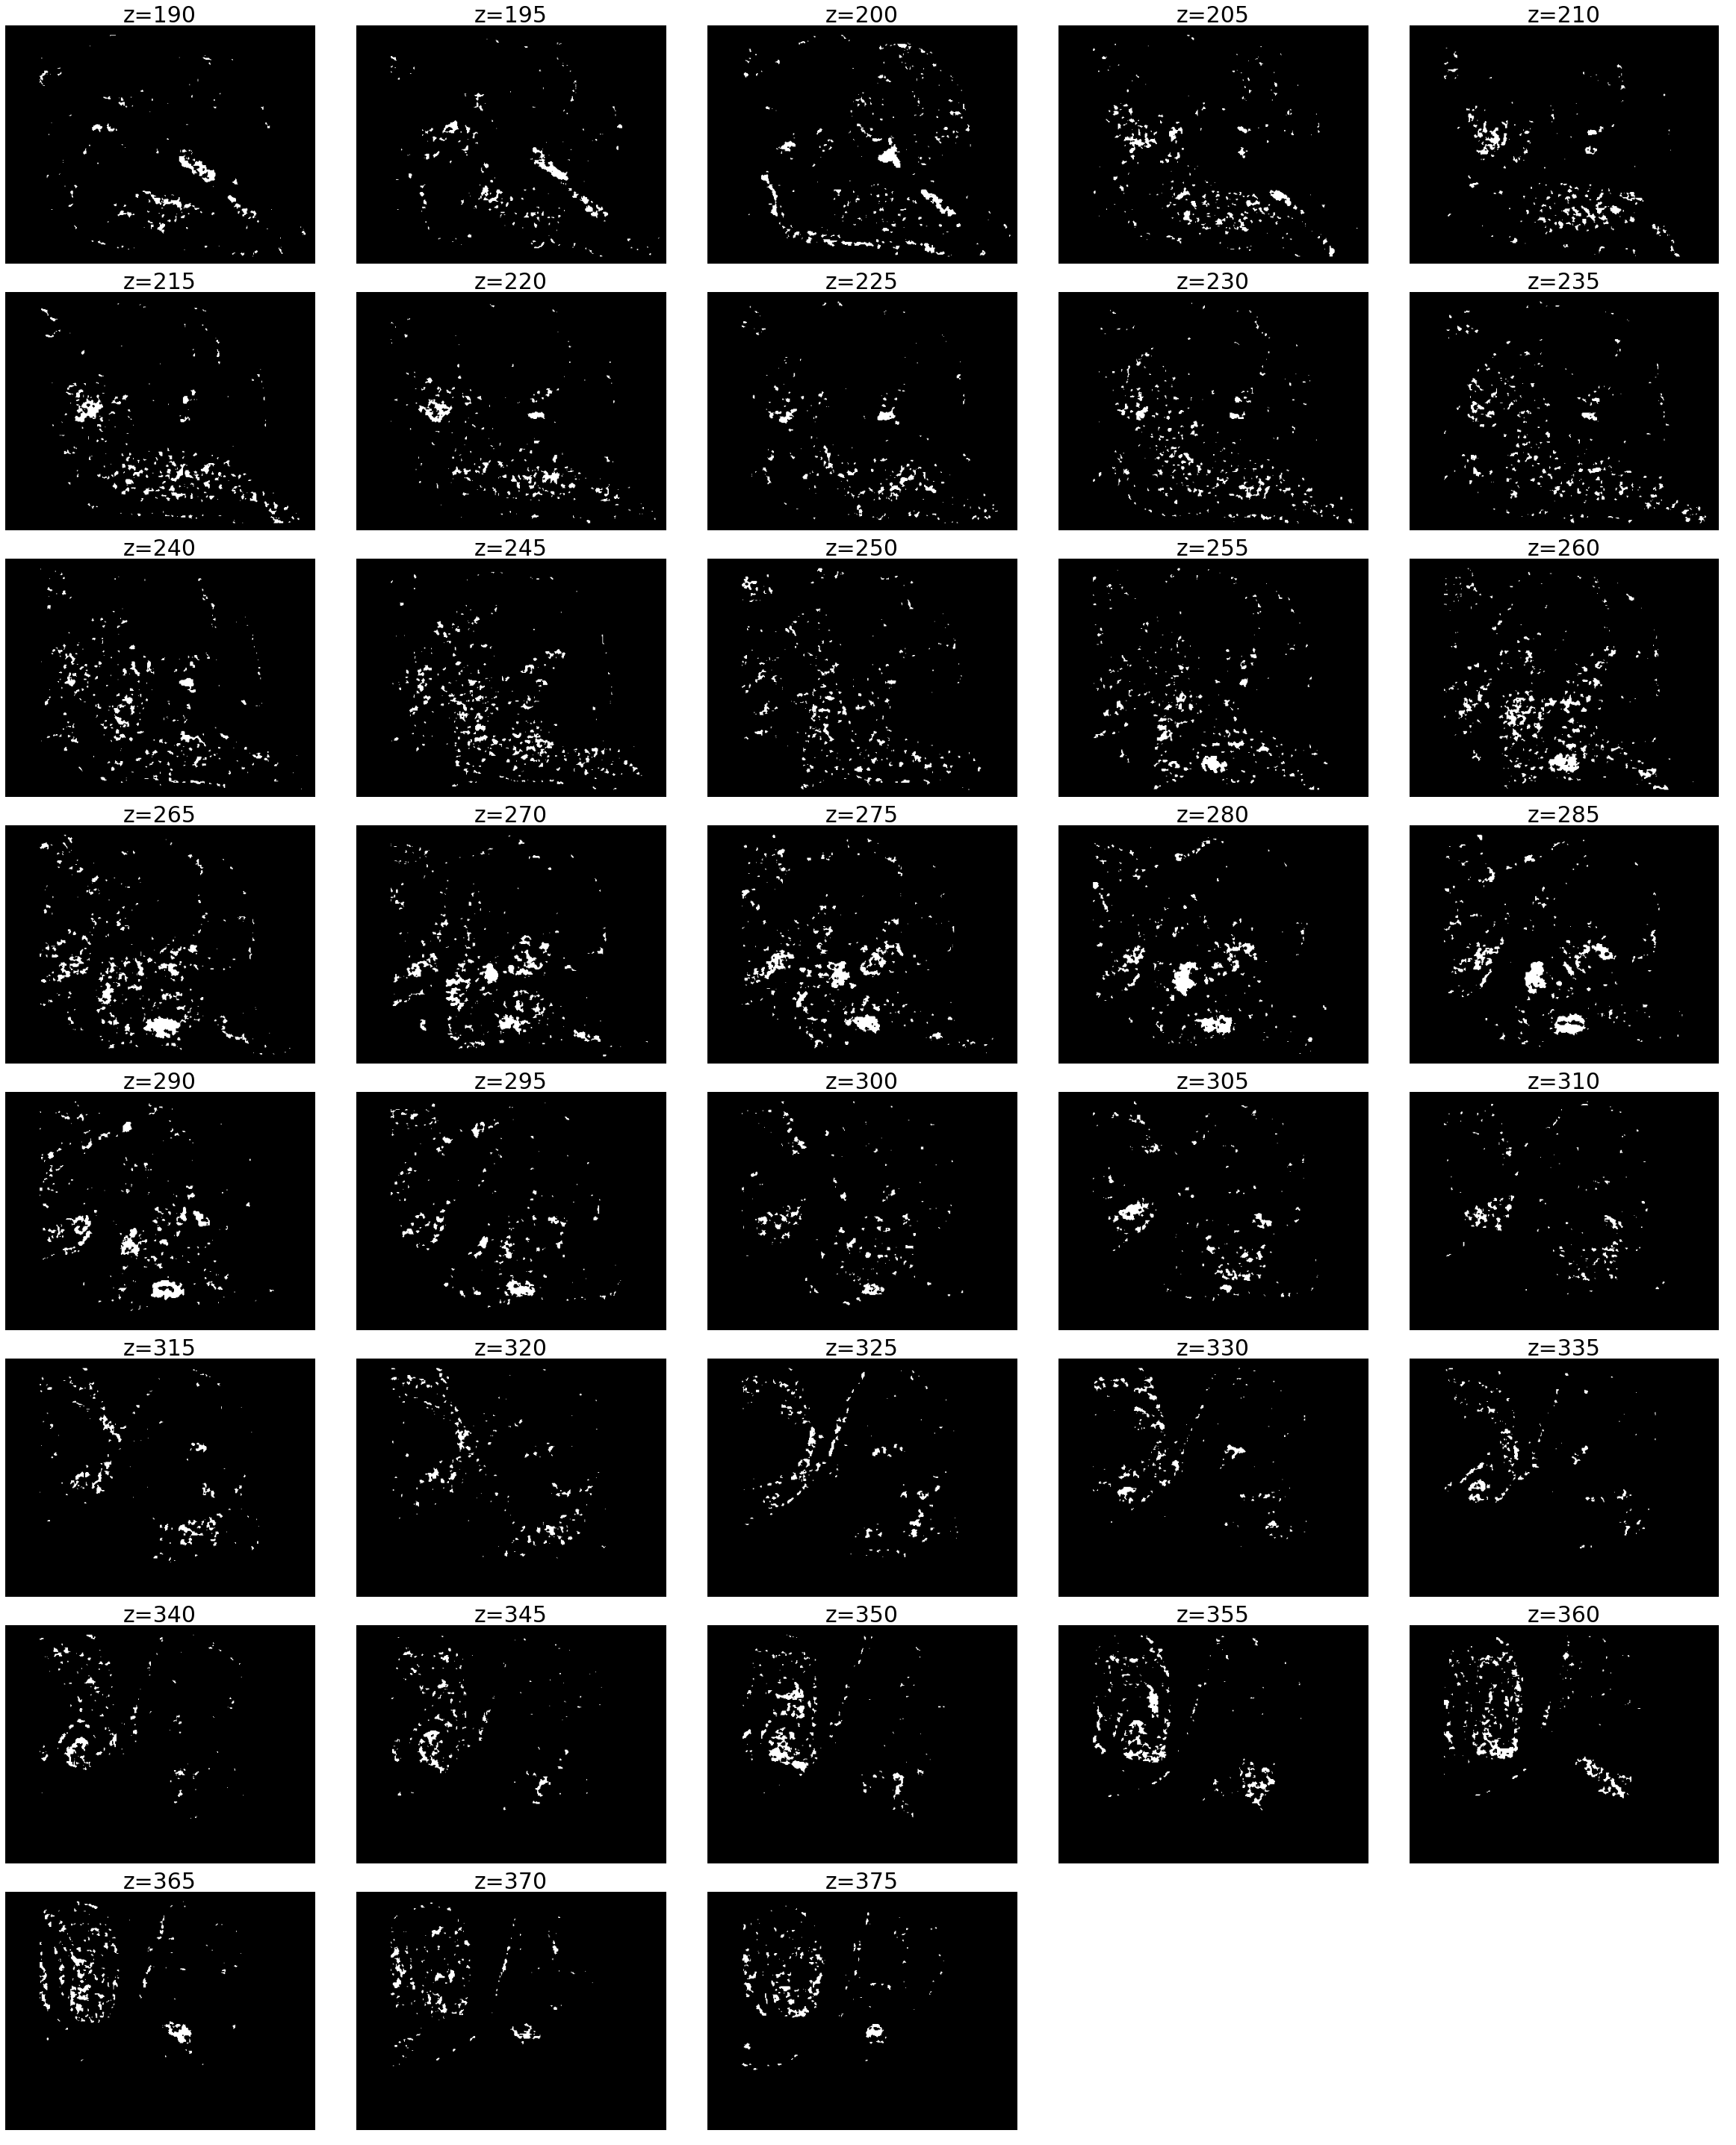

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

In [25]:
display_volume_sections(np.max([vol_opacity_all_structures['5N'],
                        vol_opacity_all_structures['7N'],
                        vol_opacity_all_structures['SNR']], axis=0), cmap=plt.cm.gray)

In [24]:
score_volume_actor_rel2uncropped_all_structures = {s: \
                                                  actor_volume(sc_vol_all_structures[s].astype(np.float32), what='score', 
                                                tb_colors={0: s2c[s], 1: s2c[s]},
                  origin=scvol_bbox_rel2uncropped_all_structures[s][[0,2,4]], 
                                                               auxdata=vol_opacity_all_structures[s])
                                                  for s in ['5N', '7N', 'SNR']}

# No score volumes

In [14]:
name_unsided_to_color2 = name_unsided_to_color.copy()
name_unsided_to_color2['7N'] = (0,255,0)
name_unsided_to_color2['5N'] = (255,0,0)
name_unsided_to_color2['SNR'] = (0,0,255)

In [38]:
shell_actor_rel2MD589uncropped = actor_mesh(shell_polydata_rel2MD589uncropped, color=(1,1,1), 
                                            opacity=.3, wireframe=False)

In [40]:
# This works best for screen.
global_transformed_atlas_actors_rel2uncropped = {name_s: actor_mesh(p, 
                                              wireframe=True if name_s in ['7N_L', '5N_L', 'SNR_L'] else False, 
                                            wireframe_linewidth=1,
                                              color=np.array(name_unsided_to_color2[convert_to_original_name(name_s)])/255., 
                                                opacity=1. if name_s in ['7N_L', '5N_L', 'SNR_L'] else 0.1, 
                                              origin=tbvol_bbox_rel2uncropped[[0,2,4]]) 
 for name_s, p in global_transformed_atlas_polydata_rel2fixedvol_list.iteritems()}

In [44]:
# This works best for snapshot to image.
global_transformed_atlas_actors_rel2uncropped = {name_s: actor_mesh(p, 
                                              wireframe=True if name_s in ['7N_L', '5N_L', 'SNR_L'] else False, 
                                            wireframe_linewidth=3,
                                              color=np.array(name_unsided_to_color2[convert_to_original_name(name_s)])/255., 
                                                opacity=1. if name_s in ['7N_L', '5N_L', 'SNR_L'] else 0.15, 
                                              origin=tbvol_bbox_rel2uncropped[[0,2,4]]) 
 for name_s, p in global_transformed_atlas_polydata_rel2fixedvol_list.iteritems()}

In [16]:
local_transformed_atlas_actors_rel2uncropped = {n: actor_mesh(p, 
#                                              wireframe=False if convert_name_to_unsided(n) == '7N' else False, 
                                             wireframe=True, 
                                             color=np.array(name_unsided_to_color2[convert_to_unsided_label(n)])/255., 
#                                              color=(0,0,1), 
#                                              opacity=1. if convert_name_to_unsided(n) == '7N' else .1,
#                                              opacity=.8,
                                            opacity=1.,
                                             origin=tbvol_bbox_rel2uncropped[[0,2,4]]) 
            for n, p in local_transformed_atlas_polydata_rel2fixedvol_list.iteritems()}

# Load original thumbnail volume.

In [13]:
from skimage.draw import polygon_perimeter
tb_volume = DataManager.load_intensity_volume(stack=stack)
tb_vol_ydim, tb_vol_xdim, tb_vol_zdim = tb_volume.shape
tb_volume = tb_volume.astype(np.float32)

# tri-color

In [194]:
from vis3d_utilities import *

In [195]:
mixed_RGB, mixed_alpha = alpha_blending_v2([sc_vol_all_structures[s] for s in ['5N', '7N', 'SNR']], 
                                           [vol_opacity_all_structures[s] for s in ['5N', '7N', 'SNR']])

/home/yuncong/Brain/utilities/vis3d_utilities.py:433: RuntimeWarning: invalid value encountered in divide
  t = vtk.VTK_FLOAT


In [208]:
mixed_scvolume_actor = actor_volume_v2(rgb=mixed_RGB, alpha=mixed_alpha*3, 
                                       origin=scvol_bbox_rel2uncropped_all_structures['5N'][[0,2,4]])

In [266]:
from skimage.color import hsv2rgb, rgb2hsv

In [308]:
name_unsided_to_color_alt = name_unsided_to_color.copy()
name_unsided_to_color_alt['7N'] = (hsv2rgb([[[1/3., 1, .8]]])[0,0]*255).astype(np.uint)
name_unsided_to_color_alt['5N'] = (hsv2rgb([[[3/3., 1, .8]]])[0,0]*255).astype(np.uint)
name_unsided_to_color_alt['SNR'] = (hsv2rgb([[[2/3., 1, .8]]])[0,0]*255).astype(np.uint)

In [ ]:
global_transformed_atlas_actors_rel2uncropped = {name_s: actor_mesh(p, 
                                              wireframe=True if name_s in ['7N_R', '5N_R', 'SNR_R'] else False, 
                                                                    wireframe_linewidth=1,
#                                               color=np.array(name_unsided_to_color[convert_to_original_name(name_s)])/255., 
                                                color=np.array(name_unsided_to_color_alt[convert_to_original_name(name_s)])/255., 
#                                                 color=(1,1,0),
#                                               opacity=.9 if name_s == '5N_L' else 0.1, 
#                                                                     opacity=1.,
#                                                                     opacity=.5 if name_s == 'SNR_R' else 1.,
                                                opacity=.8 if name_s in ['7N_R', '5N_R', 'SNR_R'] else 0.05, 
                                              origin=tbvol_bbox_rel2uncropped[[0,2,4]]) 
 for name_s, p in global_transformed_atlas_polydata_rel2fixedvol_list.iteritems()}

In [262]:
local_transformed_atlas_actors_rel2uncropped = {n: actor_mesh(p, 
#                                              wireframe=False if convert_name_to_unsided(n) == '7N' else False, 
                                             wireframe=True, 
                                                              wireframe_linewidth=2,
#                                              color=np.array(name_unsided_to_color[convert_to_unsided_label(n)])/255., 
                                             color=(0,0,0), 
#                                              opacity=1. if convert_name_to_unsided(n) == '7N' else .1,
#                                              opacity=.8,
                                            opacity=1.,
                                             origin=tbvol_bbox_rel2uncropped[[0,2,4]]) 
            for n, p in local_transformed_atlas_polydata_rel2fixedvol_list.iteritems()}

In [324]:
launch_vtk( [shell_actor_rel2MD589uncropped] \
            + [mixed_scvolume_actor] \
#             + [global_transformed_atlas_actors_rel2uncropped['7N_R'],
#              global_transformed_atlas_actors_rel2uncropped['5N_R'],
#              global_transformed_atlas_actors_rel2uncropped['SNR_R']]
           +[v for k, v in global_transformed_atlas_actors_rel2uncropped.iteritems() 
                 if parse_label(k)[1] != 'L']
           ,
            view_up=(0.315122, -0.947607, 0.052327),
            focal=(643.286526, 374.810390, 303.503019),
            position=(1002.944468, 349.774600, -2315.799224),
           snapshot_fn='/tmp/tmp.png',
           snapshot_magnification=5,
           interactive=False
          )

In [148]:
# temp_arr = np.zeros((10,10))
# for r in range(10):
#     for c in range(10):
#         v = c+r*10
#         temp_arr[c,r] = v/100.
#         if c == 9:
#             temp_arr[c,r] = 1.

In [149]:
# plt.figure(figsize=(10,10));
# plt.imshow(temp_arr, cmap=plt.cm.gray_r);
# plt.colorbar();

In [150]:
# Note that the tb volumes and atlas meshes will in general not be aligned to shell. 
# This is because the shell is only aligned to MD589, not other brains.

In [317]:
launch_vtk( [shell_actor_rel2MD589uncropped] \
           + [
#                score_volume_actor_rel2uncropped_all_structures['SNR']
               score_volume_actor_rel2uncropped_all_structures['5N']
#                score_volume_actor_rel2uncropped_all_structures['7N']
           ] \
          + [ 
#            [score_volume_actor_rel2uncropped_all_structures['5N']] + \
#             [score_volume_actor_rel2uncropped_all_structures['7N']],
#             score_volume_actor_rel2uncropped_all_structures.values(), 
#     score_volume_actor_rel2uncropped, 
#              initial_transformed_atlas_actors_rel2uncropped['7N_L'],
#              initial_transformed_atlas_actors_rel2uncropped['5N_L'],
#              initial_transformed_atlas_actors_rel2uncropped['SNR_L'],
#              initial_transformed_atlas_actors_rel2uncropped['7N_R'],
#              initial_transformed_atlas_actors_rel2uncropped['5N_R'],
#              initial_transformed_atlas_actors_rel2uncropped['SNR_R'],
#              global_transformed_atlas_actors_rel2uncropped['7N_L'],
#              global_transformed_atlas_actors_rel2uncropped['5N_L'],
#              global_transformed_atlas_actors_rel2uncropped['SNR_L'],
#              global_transformed_atlas_actors_rel2uncropped['7N_R'],
             global_transformed_atlas_actors_rel2uncropped['5N_R'],
#              global_transformed_atlas_actors_rel2uncropped['SNR_R'],
#              local_transformed_atlas_actors_rel2uncropped['SNR_R'],
#              local_transformed_atlas_actors_rel2uncropped['SNR_L'],
             local_transformed_atlas_actors_rel2uncropped['5N_R'],
#              local_transformed_atlas_actors_rel2uncropped['5N_L'],
#              local_transformed_atlas_actors_rel2uncropped['7N_R'],
#              local_transformed_atlas_actors_rel2uncropped['7N_L'],
#             actor_sphere((0,0,0), radius=10)
#             [v for k, v in global_transformed_atlas_actors_rel2uncropped.iteritems() 
#                  if parse_label(k)[1] != 'L'],
          ]
           ,
           init_angle='sagittal',
#                          view_up=(.3,-1,0),
#                position=(-4,-3,-6),
#                focal=(0,0,0),)
#                 view_up=(0.310313, -0.871887, 0.378838),
#                position=(656.777080, -371.070615, -1359.210462),
#                focal=(713.099098, 365.068824, 288.864567),)
#                          view_up=(1,-3,0),
#                position=(0,0,-4),
#                focal=(0,0,0),)
# view_up=(0.538008, -0.636632, -0.552492),
# position=(723.645618, 2145.387423, -1658.466464),
# focal=(643.286526, 374.810390, 303.503019)
#             view_up=(0.315122, -0.947607, 0.052327),
#             focal=(643.286526, 374.810390, 303.503019),
#             position=(1002.944468, 349.774600, -2315.799224)
          )


In [23]:
# Render global transformed structures + shell + thumbnail volume

launch_vtk(
    [shell_actor_rel2MD589uncropped, tb_volume_actor_rel2uncropped,           
           ] + \
#     global_transformed_atlas_actors_rel2uncropped.values() + \
          local_transformed_atlas_actors_rel2uncropped.values()
          )

In [68]:
# Render global transformed structures + shell

launch_vtk([shell_actor_rel2MD589uncropped] + \
          global_transformed_atlas_actors_rel2uncropped.values())

In [51]:
# # Render structures + shell + labeled neurons

# xys_grouped_by_section = {}
# rs_grouped_by_section = {}
# for fn in metadata_cache['valid_filenames'][stack]:
#     if fn.split('-')[1][0] == 'F':
#         try:
#             xyr_tuples = DataManager.load_labeled_neurons_filepath(stack=stack, fn=fn)
#             sec = metadata_cache['filenames_to_sections'][stack][fn]
#             xys_grouped_by_section[sec] = [(x,y) for x,y,r in xyr_tuples]
#             rs_grouped_by_section[sec] = [r for x,y,r in xyr_tuples]
#         except:
#             sys.stderr.write("No labeled neurons recorded for image %s.\n" % fn)

# from conversion import *
# volume_downsample = 32
# xyzs_grouped_by_section = points2d_to_points3d(xys_grouped_by_section, pts2d_downsample=1, 
#                                                pts3d_downsample=volume_downsample, stack=stack)

# xyzrs = np.concatenate([np.c_[xyzs + (crop_xmin + tb_vol_xmin, crop_ymin + tb_vol_ymin, tb_vol_zmin), 
#                               [r_um / (XY_PIXEL_DISTANCE_LOSSLESS * volume_downsample) for r_um in rs_grouped_by_section[sec]]]
# for sec, xyzs in xyzs_grouped_by_section.iteritems()])

# launch_vtk([shell_actor] + \
#           global_transformed_atlas_actors.values() + \
#           [actor_sphere(position=(x,y,z), radius=r) for x,y,z,r in xyzrs])

In [52]:
# # Zoom in the volume around a particular structure

# roi_name_s = '3N_R'

# vs = np.concatenate([polydata_to_mesh(local_transformed_atlas_polydata_rel2fixedvol_list[roi_name_s])[0],
# polydata_to_mesh(global_transformed_atlas_polydata_rel2fixedvol_list[roi_name_s])[0]])

# roi_xmin, roi_ymin, roi_zmin = (np.min(vs, axis=0) - 20).astype(np.int)
# roi_xmax, roi_ymax, roi_zmax = (np.max(vs, axis=0) + 20).astype(np.int)

# sc_vol = DataManager.load_original_volume(stack=stack, structure=convert_name_to_unsided(roi_name_s), 
#                                        downscale=32, detector_id=15, prep_id=2)

# sc_vol[:roi_ymin, :, :] = 0
# sc_vol[roi_ymax:, :, :] = 0
# sc_vol[:, :roi_xmin, :] = 0
# sc_vol[:, roi_xmax:, :] = 0
# sc_vol[:, :, :roi_zmin-20] = 0
# sc_vol[:, :, roi_zmax:] = 0


# score_volume_actor = actor_volume(sc_vol.astype(np.float32), what='score', 
#                                   origin=(crop_xmin + tb_vol_xmin, crop_ymin + tb_vol_ymin, tb_vol_zmin))

# launch_vtk( [score_volume_actor, 
#              global_transformed_atlas_actors[roi_name_s],
#              local_transformed_atlas_actors[roi_name_s],
#             shell_actor])